Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.
Shape of images in a batch: (32, 32, 32, 1)
Shape of labels in a batch: (32,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                         

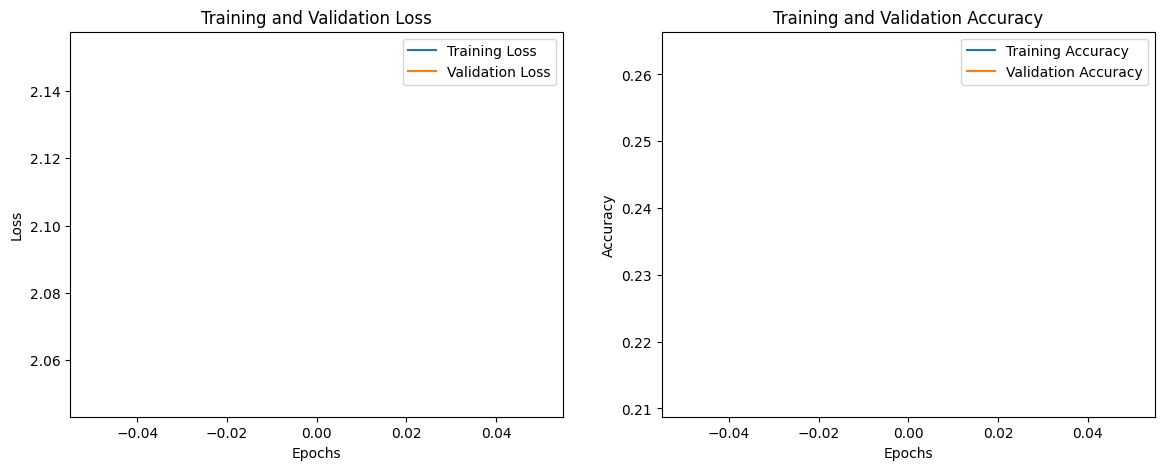

In [1]:
# a. Import the necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# b. Load the training and testing data from the directory
# Paths to train and test directories
train_dir = './cifar-10-img/train'
test_dir = './cifar-10-img/test'

# Load images with Keras in grayscale mode
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(32, 32),  # Use original CIFAR-10 image size
    color_mode="grayscale",  # Load images in grayscale
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(32, 32),
    color_mode="grayscale",
    batch_size=32
)

# Check shape after loading to confirm dimensions are correct
for images, labels in train_dataset.take(1):
    print("Shape of images in a batch:", images.shape)  # Expected: (32, 32, 32, 1)
    print("Shape of labels in a batch:", labels.shape)  # Expected: (32,)

# Normalize images to the range [0, 1]
def normalize_images(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

# c. Define the network architecture using Keras with Conv2D layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),  # Conv layer for grayscale images
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),      # Hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),       # Hidden layer with 64 units and ReLU activation
    Dense(10, activation='softmax')     # Output layer with 10 units (one for each class) and softmax activation
])

# Print model summary to confirm the architecture
model.summary()

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",  # Using sparse_categorical_crossentropy with integer labels
              metrics=["accuracy"])

# d. Train the model using SGD
history = model.fit(train_dataset, epochs=1, validation_data=test_dataset)

# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# f. Plot the training loss and accuracy
# Extract loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()